In [26]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle raw code on/off."></form>''')

In [3]:
# Importing relevant packages with their aliases
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

### The Dataset
The dataset contains data on employees who quit or stayed at their jobs. The purpose of this assignment is to uncover what could be driving churn and present findings in aeshtetically well-made plots.

Employee data:

   - `Age`: Employee Age.
   - `Attrition`: Did they churn or no? (Churned, Stayed).
   - `DistanceFromHome`: Distance of office from Employee home in Km.
   - `Education`: Degree of college education ('Bellow College', 'College', 'Bachelor's degree', 'Master's degree', 'PhD').
   - `EducationField`: Field of study.
   - `Gender`: Gender of employee ('Male', 'Female').
   - `MonthlyIncome`: Monthly Income in USD $.
   - `PercentSalaryHike`: % increase in salary last year.
   - `PerformanceRating`: Rating of Employee Performance (Low, Good, Great, Excellent).
   - `YearsAtCompany`: Number of years spent at company.
   - `Survey responses`:
       -  `EnvironmentSatisfaction`: Rating of Employee Satisfaciton with work environment (Low, Good, Great, Excellent).
       - `JobInvolvement`: Rating of Employee Job Involvement (Low, Good, Great, Excellent).
       - `JobSatisfaction`: Rating of Employee Job Satisfaction (Low, Good, Great, Excellent).
       - `RelationshipSatisfaction`: Rating of Employee Relationships Satisfaction (Low, Good, Great, Excellent).
       - `WorklifeBalance`: Rating of Employee Work life balance Satisfaction (Low, Good, Great, Excellent).

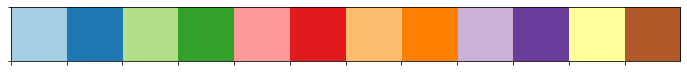

In [7]:
# Choose a color palette 
current_palette = sns.color_palette('Paired')
sns.palplot(current_palette)

In [14]:
# Alias your colors
light_blue = current_palette[0]
dark_blue = current_palette[1]
light_orange = current_palette[6]
dark_orange = current_palette[7]

In [10]:
# Read data
employee_churn = pd.read_csv('https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/employee_churned_trimmed.csv?raw=true', index_col = "Unnamed: 0")

In [13]:
# Look at head of data
employee_churn.head()

Age Attrition  DistanceFromHome        Education EducationField  \
0   41   Churned                 1          College  Life Sciences   
1   49    Stayed                 8    Below College  Life Sciences   
2   37   Churned                 2          College          Other   
3   33    Stayed                 3  Master's degree  Life Sciences   
4   27    Stayed                 2    Below College        Medical   

  EnvironmentSatisfaction  Gender JobInvolvement JobSatisfaction  \
0                    Good  Female          Great       Excellent   
1                   Great    Male           Good            Good   
2               Excellent    Male           Good           Great   
3               Excellent  Female          Great           Great   
4                     Low    Male          Great            Good   

   MonthlyIncome  PercentSalaryHike PerformanceRating  \
0           5993                 11             Great   
1           5130                 23         Excellent   
2           2090                 15             Great   
3           2909                 11             Great   
4           3468                 12             Great   

  RelationshipSatisfaction  StandardHours WorkLifeBalance  YearsAtCompany  
0                      Low             80             Low               6  
1                Excellent             80           Great              10  
2                     Good             80           Great               0  
3                    Great             80           Great               8  
4                Excellent             80           Great               2

In [11]:
# Look at datatypes
print(employee_churn.dtypes)

Age                          int64
Attrition                   object
DistanceFromHome             int64
Education                   object
EducationField              object
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement              object
JobSatisfaction             object
MonthlyIncome                int64
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
WorkLifeBalance             object
YearsAtCompany               int64
dtype: object


In [ ]:
# Add Yearly Income Variable
employee_churn["YearlyIncome"] = employee_churn["MonthlyIncome"] * 12

In [45]:
# Look at distributions
print(employee_churn.describe())

               Age  DistanceFromHome  MonthlyIncome  PercentSalaryHike  \
count  1470.000000       1470.000000    1470.000000        1470.000000   
mean     36.923810          9.192517    6502.931293          15.209524   
std       9.135373          8.106864    4707.956783           3.659938   
min      18.000000          1.000000    1009.000000          11.000000   
25%      30.000000          2.000000    2911.000000          12.000000   
50%      36.000000          7.000000    4919.000000          14.000000   
75%      43.000000         14.000000    8379.000000          18.000000   
max      60.000000         29.000000   19999.000000          25.000000   

       StandardHours  YearsAtCompany   YearlyIncome  
count         1470.0     1470.000000    1470.000000  
mean            80.0        7.008163   78035.175510  
std              0.0        6.126525   56495.481397  
min             80.0        0.000000   12108.000000  
25%             80.0        3.000000   34932.000000  
50%      

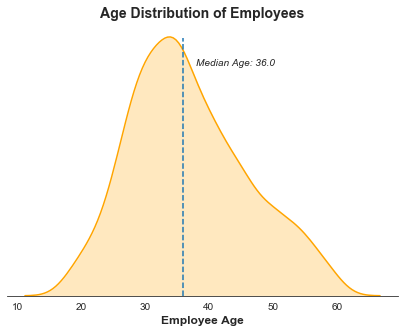

In [12]:
# Set initial plot options
sns.set_style("white")
plt.figure(figsize = (7,5))

# Create plot
sns.distplot(employee_churn["Age"],  color = 'orange', kde_kws = {'shade': True}, hist = False)

# Add vertical line
plt.axvline(employee_churn['Age'].median(), ymax = 0.95, linestyle = "--")

# Add median age of all employees
plt.text(employee_churn['Age'].median() + 2, 0.04, "Median Age: " + str(employee_churn['Age'].median()),
         style = 'italic', fontsize = 10)

# Despine plot (take away y-axis line)
sns.despine(left = True)

# Add finishing touches
plt.yticks([])
plt.xlabel('Employee Age', fontsize = 12, fontweight = 'semibold')
plt.title('Age Distribution of Employees', fontsize = 14, fontweight = 'semibold')
plt.show()

### Subplots
What is the Distribution of Age by Gender? 

In [48]:
# Subset on males and compute their median age and median yearly income
male_churn = employee_churn[employee_churn['Gender'] == "Male"]
median_male_age = male_churn['Age'].median()
median_male_income = male_churn['YearlyIncome'].median()

# Subset on females and compute their median age median yearly income
female_churn = employee_churn[employee_churn['Gender'] == "Female"]
median_female_age = female_churn['Age'].median()
median_female_income = female_churn['YearlyIncome'].median()

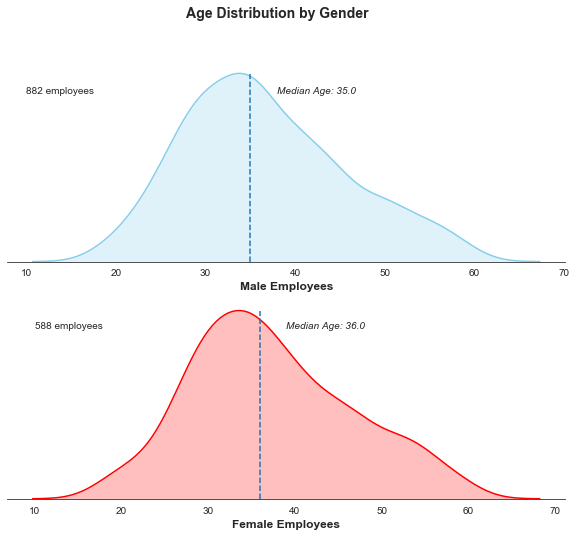

In [40]:
# Set initial plot options
sns.set_style('white')

# Create figure and axes
fig, axes = plt.subplots(2, 1, figsize = (10, 8))

# Create plot of male age distribution on first axes
sns.distplot(male_churn['Age'], color = 'skyblue', kde_kws = {'shade': True}, 
             hist = False, ax = axes[0])

# Add vertical line and annotate median age for male employees on first axes
axes[0].axvline(median_male_age, ymax = 0.95, linestyle = "--")
axes[0].text(median_male_age + 3, 0.04, "Median Age: " + str(median_male_age),
         style = 'italic', fontsize = 10)

# Add number of male employees for context
axes[0].text(10, 0.04, str(male_churn.shape[0]) + " employees", fontsize = 10)

# Format subplot in first axes
axes[0].set_yticks([])
axes[0].set_xlabel('Male Employees', fontsize = 12, fontweight = 'semibold')

# Create plot of female age distribution on second axes
sns.distplot(female_churn['Age'], color = 'red', kde_kws = {'shade': True}, 
             hist = False, ax = axes[1])

# Add vertical line and annotate median age for female employees on second axes
axes[1].axvline(median_female_age, ymax = 0.95, linestyle = "--")
axes[1].text(median_female_age + 3, 0.04, "Median Age: " + str(median_female_age),
         style = 'italic', fontsize = 10)

# Add number of female employees for context
axes[1].text(10, 0.04, str(female_churn.shape[0]) + " employees", fontsize = 10)

# Despine visualizations
axes[1].set_yticks([])
axes[1].set_xlabel('Female Employees', fontsize = 12, fontweight = 'semibold')

# Figure final formatting  
sns.despine(left = True)

fig.suptitle('Age Distribution by Gender', fontsize = 14, fontweight = 'semibold')
plt.show()

### Barplots
What is the distribution of education by gender? 

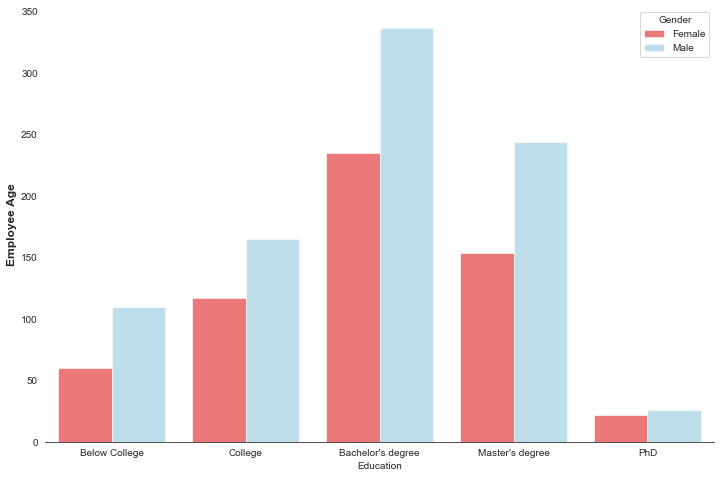

In [49]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (12, 8))

# Create a countplot
sns.countplot(x = 'Education', 
              hue = 'Gender', 
              data = employee_churn,
              order = ['Below College', 'College', "Bachelor's degree", "Master's degree", "PhD"]
              , palette = ["red", "skyblue"], alpha = .6
                 )

# Despine visualizations
sns.despine(left = True)

# Final styling touche
plt.ylabel('Number of Employees', fontsize = 12, fontweight = 'semibold')

plt.show()

### Boxplots

In [53]:
# A note on zip()
first_names = ['Adel', 'Sara', 'Lis']
last_names = ['Nehme', 'Billen', 'Sulmont']

# Zip iterables (creates a tuple)
# for first, last in zip(first_names, last_names):
    #print(first, last.upper())

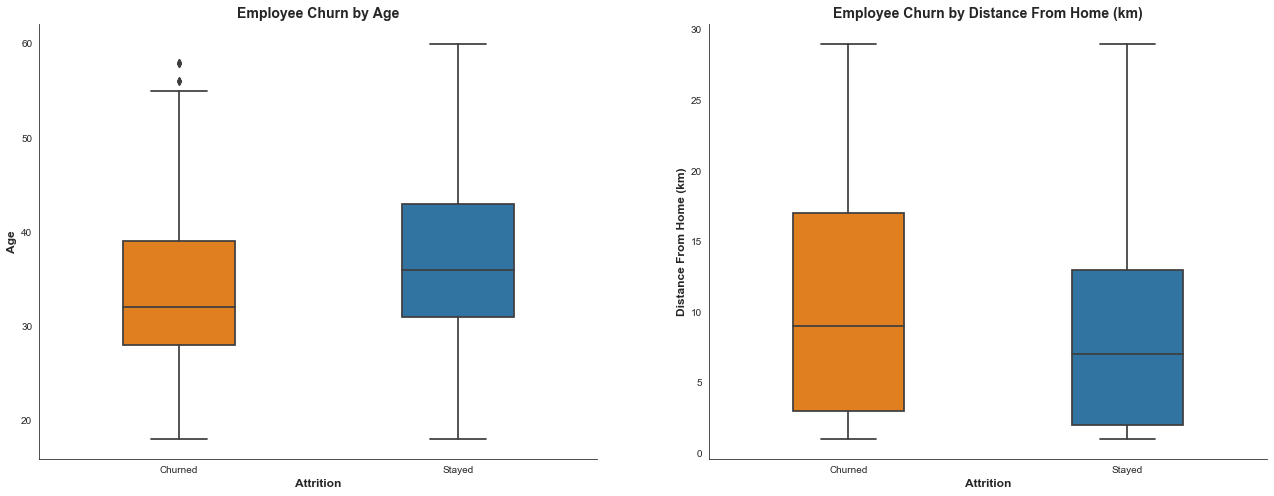

In [16]:
# Set initial plot options
sns.set_style('white')

# Create helper lists
columns_to_plot = ['Age', "DistanceFromHome"]
titles_to_plot = ["Age", "Distance From Home (km)"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize = (22, 8))

# Iterate over each axes, and plot a boxplot with relevant columns/titles
for ax, column, title in zip(axes, columns_to_plot, titles_to_plot):
    
  # Create a boxplot
  sns.boxplot(x = 'Attrition', y = column, data= employee_churn, 
              order = ['Churned', 'Stayed'], 
              width = 0.4,
              linewidth = 1.75,
              palette = [dark_orange, dark_blue],
              ax = ax)
  
  # Despine plot
  sns.despine()

  # Fix final styling for each axes
  ax.set_xlabel('Attrition', fontsize = 12, fontweight = 'semibold')
  ax.set_ylabel(title, fontsize = 12, fontweight = 'semibold')
  ax.set_title('Employee Churn by ' + title, fontweight = 'semibold', fontsize = 14)

plt.show()

### 100% Barplot
What do churners vs. non-churners think of us? 

In [17]:
# Compute proportion of RelationshipSatisfaction by Attrition categories
relationship_attrition = pd.crosstab(employee_churn['RelationshipSatisfaction'],
                                    employee_churn['Attrition']
                                     , normalize = 'index').reset_index() #changes to percentage

# Unify proportions as percentages
relationship_attrition[['Churned', 'Stayed']] = relationship_attrition[['Churned', 'Stayed']] * 100
relationship_attrition['Total'] = relationship_attrition['Churned'] + relationship_attrition['Stayed']

# See changes
relationship_attrition

Attrition RelationshipSatisfaction    Churned     Stayed  Total
0                        Excellent  14.814815  85.185185  100.0
1                             Good  14.851485  85.148515  100.0
2                            Great  15.468410  84.531590  100.0
3                              Low  20.652174  79.347826  100.0

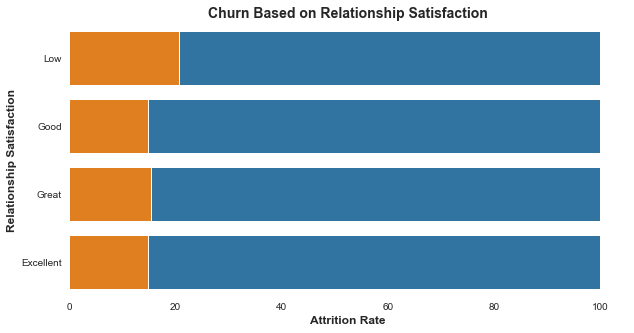

In [18]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (10,5))

# Plot the total percentage of employees first (i.e. 100%)
sns.barplot(x = 'Total', y = 'RelationshipSatisfaction', data = relationship_attrition,
           order = ['Low', 'Good', 'Great', 'Excellent'], color = dark_blue)

# Plot the percentage of employees who churned 
sns.barplot(x = 'Churned', y = 'RelationshipSatisfaction', data = relationship_attrition,
           order = ['Low', 'Good', 'Great', 'Excellent'], color = dark_orange)

# Despine plot
sns.despine(left = True, bottom = True)

# Final formatting changes
plt.xlabel('Attrition Rate', fontweight = 'semibold', fontsize = 12)
plt.ylabel('Relationship Satisfaction', fontweight = 'semibold', fontsize = 12)
plt.title('Churn Based on Relationship Satisfaction', fontweight = 'semibold', fontsize = 14)

plt.show()

In [115]:
#figure, axes = plt.subplots(2,2)

#### More survey responses

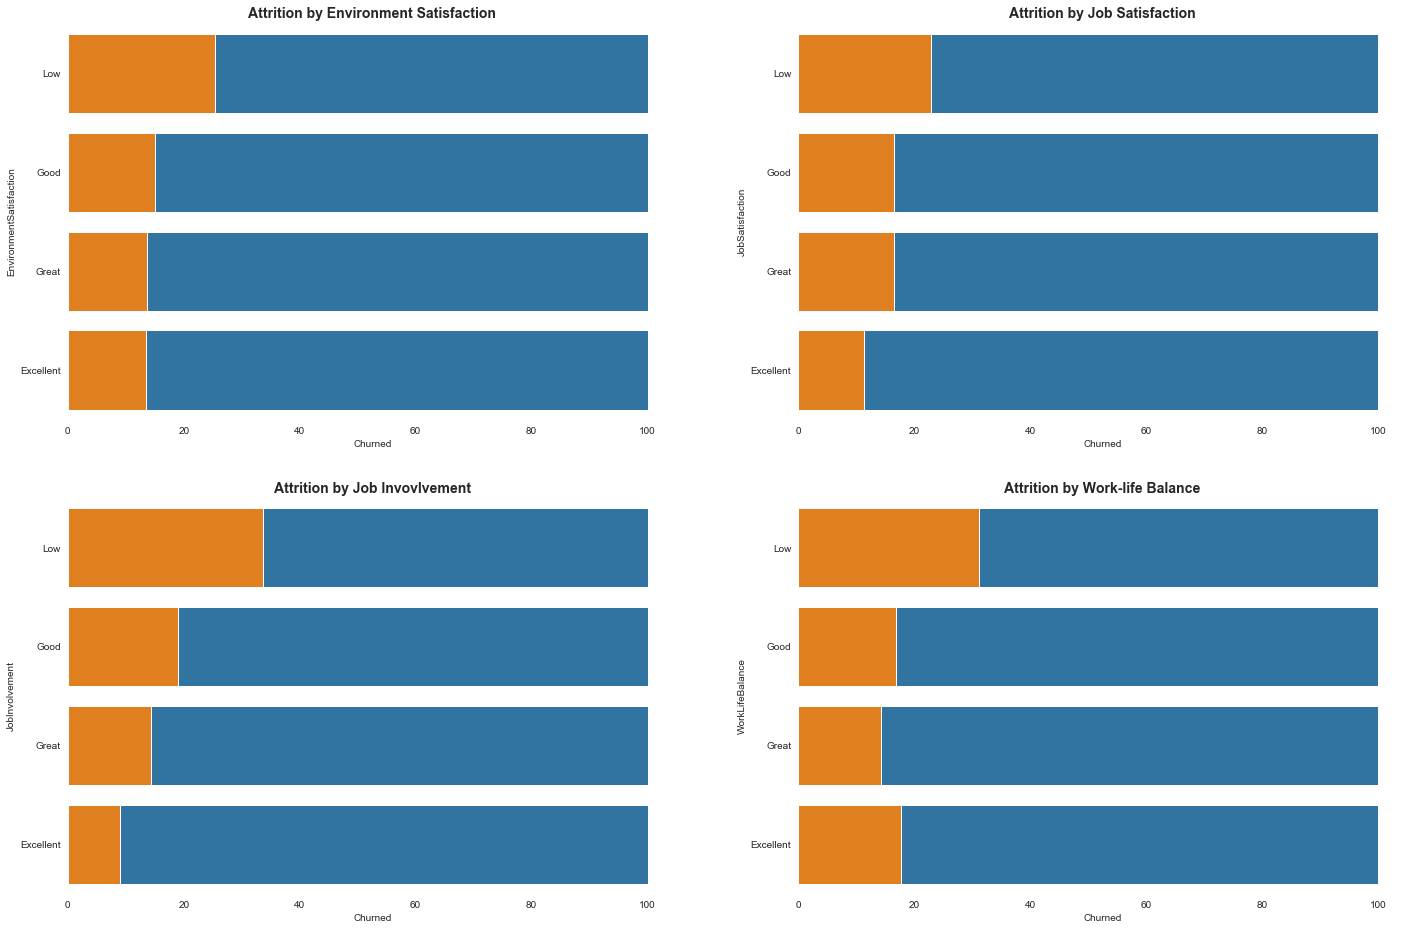

In [20]:
# Set initial plot options
sns.set_style('white')

# Create helper lists
survey_columns = ["EnvironmentSatisfaction", "JobSatisfaction", "JobInvolvement", "WorkLifeBalance"]
survey_titles = ["Environment Satisfaction", "Job Satisfaction", "Job Invovlvement", "Work-life Balance"]

# Create subplots - 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# For every element
for ax, survey_question, title in zip(axes.flatten(), survey_columns, survey_titles): 
  
  # Cross tabulate data and generate proportions for ecah survey question
  proportions = pd.crosstab(employee_churn[survey_question],
                              employee_churn['Attrition'],
                              normalize = 'index').reset_index() #changes to percentage
    
  # Find percentages instead of proportions
  proportions[['Churned', 'Stayed']] = proportions[['Churned', 'Stayed']] * 100
    
  # Get total column for each survey question
  proportions['Total'] = proportions['Churned'] + proportions['Stayed']
  
  # Plot Total plot
  sns.barplot(x = 'Total', y = survey_question, data = proportions, 
              order = ['Low', 'Good', 'Great', 'Excellent'], color = dark_blue, ax = ax)

  # Plot Churned plot
  sns.barplot(x = 'Churned', y = survey_question, data = proportions,
              order = ['Low', 'Good', 'Great', 'Excellent'], color = dark_orange, ax = ax)

  # Despine plot
  sns.despine(left = True, bottom = True)
  
  # Set final formatting
  ax.set_title('Attrition by ' + title, fontweight = 'semibold', fontsize = 14)

plt.show()


### Scatterplots
What are initiatives that could decrease churn? 

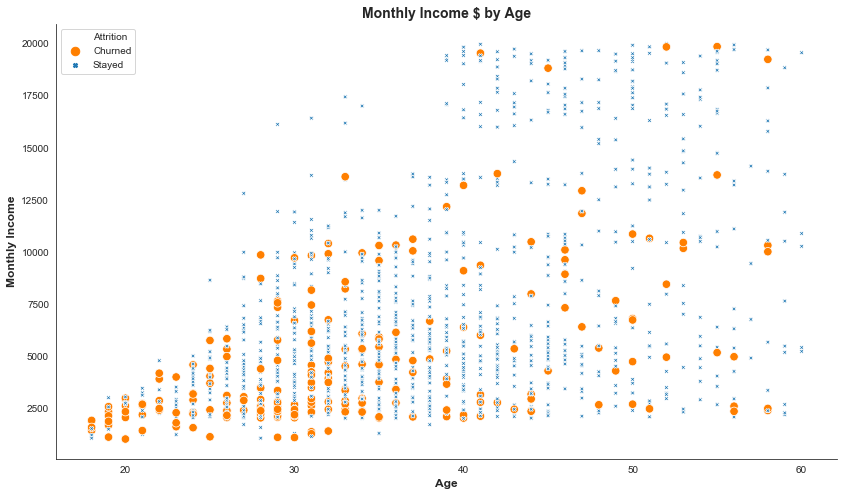

In [21]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create scatterplot
sns.scatterplot(x = 'Age', y = "MonthlyIncome", hue = 'Attrition', data = employee_churn,
               size = 'Attrition', style = 'Attrition', palette = [dark_orange, dark_blue])

# Despine plot
sns.despine()

# Final formatting touches
plt.xlabel('Age', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Monthly Income', fontsize = 12, fontweight = 'semibold')
plt.title('Monthly Income $ by Age', fontsize = 14, fontweight = 'semibold')

plt.show()

__Income by Education Level and Gender__

In [44]:
#print(employee_churn.columns)

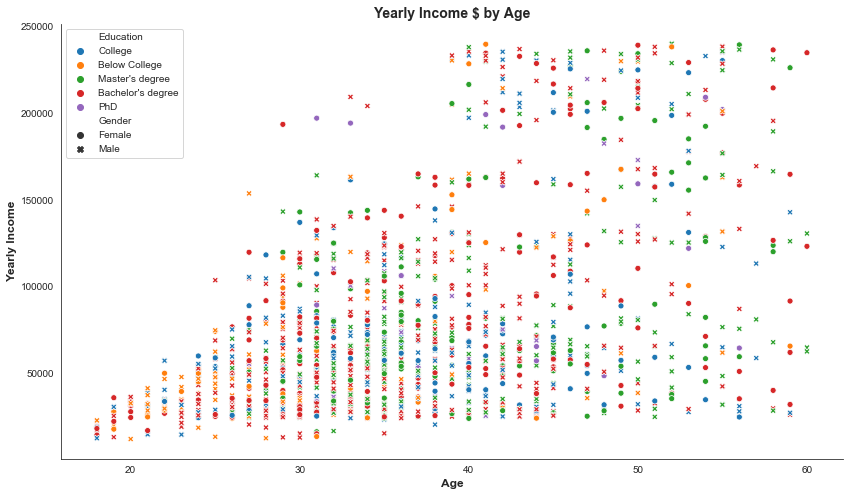

In [43]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create scatterplot
sns.scatterplot(x = 'Age', y = "YearlyIncome", hue = 'Education', data = employee_churn,
                #order = ['Below College', 'College', "Bachelor's degree", "Master's degree", "PhD"], 
                style = 'Gender')

# Despine plot
sns.despine()

# Final formatting touches
plt.xlabel('Age', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Yearly Income', fontsize = 12, fontweight = 'semibold')
plt.title('Yearly Income $ by Age', fontsize = 14, fontweight = 'semibold')

plt.show()

__Did last year's salary inreases impact churn?__

In [22]:
# Create categories for raises
employee_churn['raise_category'] = pd.cut(employee_churn['PercentSalaryHike'], [10, 15, 20, 25],
                                          labels = ['10-15%', '15-20%', '20-25%']) 

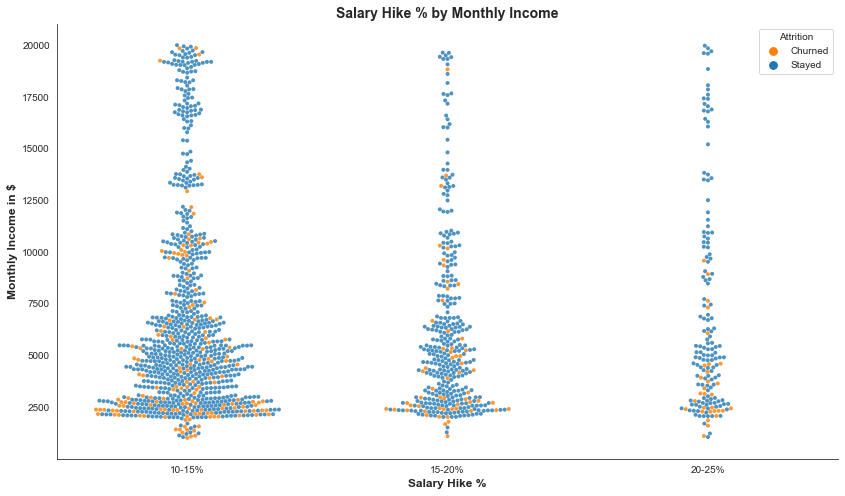

In [23]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create swarmplot
sns.swarmplot(x = 'raise_category', y = 'MonthlyIncome', hue = 'Attrition', 
              data = employee_churn, size = 4, alpha = 0.8, palette = [dark_orange, dark_blue])

# Despine plot
sns.despine()
    
# Final formatting touches
plt.xlabel('Salary Hike %', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Monthly Income in $', fontsize = 12, fontweight = 'semibold')
plt.title('Salary Hike % by Monthly Income', fontsize = 14, fontweight = 'semibold')

plt.show()

### Lineplots
Does loyalty (years with company) or lack thereof drive churn? 

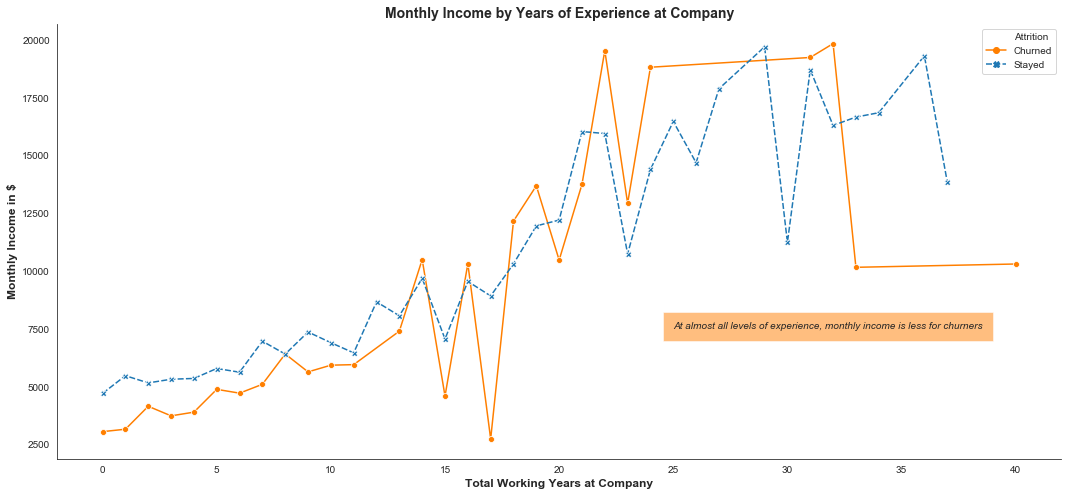

In [25]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (18, 8))

# Create a lineplot
sns.lineplot(x = 'YearsAtCompany', y = 'MonthlyIncome', hue = 'Attrition', data = employee_churn,
            markers = True, ci = None, style = 'Attrition', palette = [dark_orange, dark_blue])

# Add text to elaborate on plot insights
plt.text(25, 7500, "At almost all levels of experience, monthly income is less for churners",
        fontsize = 10, fontstyle = 'italic', bbox = {'facecolor': dark_orange, 'alpha': 0.5, 'pad': 10})

# Despine plot
sns.despine()

# Final formatting
plt.xlabel('Total Working Years at Company', fontsize = 12, fontweight = 'semibold')
plt.ylabel('Monthly Income in $', fontsize = 12, fontweight = 'semibold')
plt.title('Monthly Income by Years of Experience at Company', fontsize = 14, fontweight = 'semibold')

plt.show()